In [385]:
# @file        : soru1_b141210306_emre_bodur.ipynb
# @description : Python dili, "ScikitLearn" kütüphanesi ile Makine Öğrenmesi
# @course      : Pratikte BT Ve BS Uygulamaları
# @assignment  : 2. Proje Ödevi
# @date        : 24.05.2021
# @author      : Emre Bodur (B141210306)
# @link1       : https://medium.com/@ekrem.hatipoglu/machine-learning-classification-naive-bayes-part-11-4a10cd3452b4
# @link2       : https://www.veribilimiokulu.com/naive-bayes-yontemiyle-siniflandirma-classification-with-naive-bayes-python-ile-uygulama  
# @link3       : https://yapayakademi.com/makine-ogrenmesi-siniflandirma-baslangic-seviyesi
# @link4       : https://www.kaggle.com/sixteenpython/machine-learning-with-iris-dataset
# @link5       : https://qastack.info.tr/programming/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset

In [386]:
# Proje ile ilgili kütüphaneler dahil ediliyor.
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd
import joblib

In [387]:
# iris dataseti yükleniyor
from sklearn.datasets import load_iris
irisData = load_iris()

In [388]:
# Projeye veri setinin dahil edilmesinden sonra bağımlı ve bağımsız değişkenleri oluşturmak için aşağıdaki kod satırını yazdım. 
# Böylece bağımsız nitelikleri X, bağımlı niteliği y değişkenine atadım.
X = irisData.data
y = irisData.target

In [389]:
# pandas modülü ile dataframe oluşturuluyor.
# iris dataseti içerisindeki ilk 5 kayıt gösteriliyor.
data_frame = pd.DataFrame(irisData.data, columns=irisData.feature_names)
data_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [390]:
print(irisData.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [391]:
# Veri seti içerisindeki verileri eğitim ve test veri setleri olarak ayırdım.
# Doğru sonuç almak için verinin % 75’i eğitim için, % 25’i ise test için ayrıldı.
# test_size değeri değiştirilerek farklı sonuçlar elde edilebilir.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [392]:
# BURAYA KADAR TÜM İŞLEMLER ALGORİTMADAN BAĞIMSIZ VE ORTAKTIR. 
# BU NOKTADAN SONRA SEÇİLEN ALGORİTMAYA GÖRE YORUM SATIRLARINI AÇIP KAPATARAK FARKLI DENEMELER GERÇEKLEŞTİRİLEBİLİR.

In [393]:
# Gaussian Naive Bayes algroritması ile model nesnesi oluşturuyorum. 
model = GaussianNB()

In [394]:
# Karar ağacı algoritması ile bir model nesnesi tanımlayalım.
# model = GaussianNB() bulunduğu satır comment yapılmalıdır.
# model = DecisionTreeClassifier()

In [395]:
# Oluşturduğumuz modeli verilerimiz ile eğitelim.
#model.fit(X_train, y_train)

In [396]:
# Modelimizi eğittik.
# Uygulamamızda kullanacağımız veri miktarı büyüdüğünde modeli eğitmek zaman alabilir.
# Veya başarı oranı her zaman yakalanmayabilir.
# Bu nedenle modeli birkez eğittikten sonra kaydederek kayıtlı modelden çalıştırmak faydalı olacaktır.
# Eğittiğimiz modeli dosyaya kaydedelim.
# Bunun için sklearn tarafından sunulan joblib modülünü kullacağız.
# Hangi algoritma seçilecekse ona ilişkin satır kullanılmalıdır.
#joblib.dump(model, 'egitilmis_model_GaussianNB.joblib')
#joblib.dump(model, 'egitilmis_model_DecisionTree.joblib')

In [397]:
# Eğittiğimiz modeli dosyadan yükleyelim.
# Eğitilen bir modeli kullanacağımı için yukarıdaki model.fit(X_train, y_train) satırını comment satırı yapmalıyız.
model = joblib.load('egitilmis_model_GaussianNB.joblib')
#model = joblib.load('egitilmis_model_DecisionTree.joblib')

In [398]:
# modeli görsel olarak incelemek için ağaç nesnei ile export ediyorum.
# dot uzantılı dosyayı Visual Studio Code ile açabiliriz.
# Ağacı görüntülemek için joaompinto.vscode-graphviz eklentisi yüklü olmalıdır.
#tree.export_graphviz(model, out_file = 'model_tree.dot', label = 'all', filled = True, rounded = True)

In [399]:
# Test Seti ile tahmin yaptım ayırdığım test setimi (X_test) kullanarak oluşturduğum model 
# ile tahmin yapalım ve elde ettiğimiz set (y_pred) ile hedef değişken (y_test) test setimizi karşılaştıralım.
y_pred = model.predict(X_test)

In [400]:
# Tahmin Sonuçlarını Test Sonuçları ile Karşılaştırma
# Hata matrisi (confusion matrix) kullanarak modelin başarısını ölçelim:
print('Karmaşıklık Matrisi:')
hata_matrisi = confusion_matrix(y_test, y_pred)
print(hata_matrisi)

Karmaşıklık Matrisi:
[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]


In [401]:
# Karmaşıklık Matrisini Yorumlayalım
# 38 tane test kaydında Setosa sınıfına ait 13 tane kayıt varmış ve hepsi doğru tahmin edilmiş. 
# 16 tane versicolor varmış bunların tamamı doğru tahmin edilmiş. 
# 9 tane virginica varmış ve hepsi de başarıyla virginica olarak tahmin edilmiş.

In [412]:
# Başarı Oranı
# Bu örneğimizde modelimiz test_size = 0.25 ile GaussianNB sınıfını kullanarak %100 oranında başarı ile çalıştı.
print ("Doğruluk : ", accuracy_score(y_test, y_pred))

Doğruluk :  1.0


In [410]:
# @link https://towardsdatascience.com/machine-learning-basics-naive-bayes-classification-964af6f2a965
# Gerçek Değerlerin Öngörülen Değerlerle Karşılaştırılması
# Bu adımda, hem orijinal Test setinin (y_test) hem de tahmin edilen sonuçların (y_pred) 
# sınıflandırılmış değerlerini karşılaştırmak için bir Pandas DataFrame oluşturulur.
df = pd.DataFrame({'Gerçek Değerler':y_test, 'Tahmin Edilen Değerler':y_pred})
df

,Gerçek Değerler,Tahmin Edilen Değerler
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0
5,2,2
6,0,0
7,1,1
8,1,1
9,1,1


([], [])

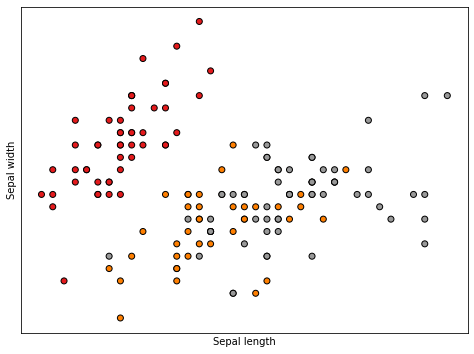

In [411]:
plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xticks(())
plt.yticks(())